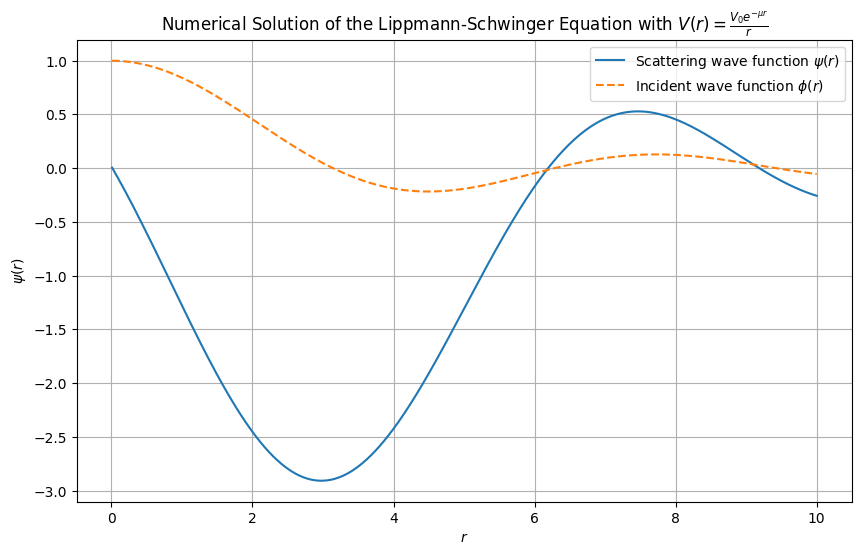

In [1]:
import numpy as np
from scipy.special import spherical_jn
from scipy.integrate import simps
import matplotlib.pyplot as plt

# Define parameters
r_min, r_max = 0.01, 10.0  # Range for radial coordinates
num_points = 1000  # Number of points for discretization
epsilon = 1e-8  # Small number for imaginary part in Green's function
k = 1.0  # Wave number for incident wave
V_0 = 1.0  # Potential strength
mu = 0.7  # Decay parameter for the potential

# Discretize the radial coordinate
r = np.linspace(r_min, r_max, num_points)
dr = r[1] - r[0]

# Potential function
def V(r, V_0, mu):
    return V_0 * np.exp(-mu * r) / r

# Incident wave function (spherical Bessel function of the first kind, j0)
def phi(r, k):
    return np.sin(k * r) / r

# Green's function for the scattering problem
def G_0(r, r_prime, k):
    return np.sin(k * np.abs(r - r_prime)) / (k * np.abs(r - r_prime) + epsilon)

# Compute the Hankel transform of the potential
def V_hankel(k, V_0, mu):
    return 2 * V_0 * mu / (mu**2 + k**2)**2

# Compute the matrix elements of the potential in the Hankel transform basis
def V_matrix(r, V_func, V_0, mu):
    V_r = V_func(r, V_0, mu)
    return np.diag(V_r)

# Compute the Green's function matrix
def G_matrix(r, k, epsilon):
    G_mat = np.zeros((len(r), len(r)))
    for i in range(len(r)):
        for j in range(len(r)):
            if i != j:
                G_mat[i, j] = G_0(r[i], r[j], k) * r[j]**2 * dr
            else:
                G_mat[i, j] = 0  # Avoid singularity at i == j
    return G_mat

# Compute the integral kernel matrix
def integral_kernel_matrix(r, V_func, V_0, mu, k, epsilon):
    V_mat = V_matrix(r, V_func, V_0, mu)
    G_mat = G_matrix(r, k, epsilon)
    return np.dot(G_mat, V_mat)

# Solve the Lippmann-Schwinger equation for the scattering problem
def solve_lippmann_schwinger(r, V_func, V_0, mu, k, epsilon):
    phi_r = phi(r, k)
    K = integral_kernel_matrix(r, V_func, V_0, mu, k, epsilon)
    I = np.eye(len(r))
    psi_r = np.linalg.solve(I - K, phi_r)
    return psi_r

# Compute the scattering solution
psi_r = solve_lippmann_schwinger(r, V, V_0, mu, k, epsilon)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(r, psi_r, label='Scattering wave function $\psi(r)$')
plt.plot(r, phi(r, k), label='Incident wave function $\phi(r)$', linestyle='dashed')
plt.xlabel('$r$')
plt.ylabel('$\psi(r)$')
plt.title('Numerical Solution of the Lippmann-Schwinger Equation with $V(r)=\\frac{V_0 e^{-\mu r}}{r}$')
plt.legend()
plt.grid()
plt.show()
